### Setting

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

### 데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/관세청공모전/크롤링데이터/news_전처리찐최종.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,raw_text,date,url,processed_text,nouns_only,filtered_nouns_only,word_list
0,"""KC인증이 능사 아냐…계속 모니터링 해야""[中직구 안전성 논란④]","""KC인증이 능사 아냐…계속 모니터링 해야""[中직구 안전성 논란④] ""발암물질 및...",2024-06-03,https://www.newsis.com/view/?id=NISX20240531_0...,"['KC', '인증', '능사', '아냐', '계속', '모니터링', '해야', '...",인증 능사 계속 모니터링 직구 안전성 논란 발암 물질 유해 물질 검 문제 반복 발생...,인증 능사 계속 모니터링 직구 안전성 논란 발암 물질 유해 물질 문제 반복 발생 사...,"['인증', '능사', '계속', '모니터링', '직구', '안전성', '논란', ..."
1,"'직구 금지' 철회한 정부, 유해물품 안전성 검증할 방법은 - 머니S",최근 정부가 해외 직구 규제 대책을 발표했다가 번복하면서 소비자 혼란이 가중되고 있...,2024-06-03,https://www.moneys.co.kr/article/2024053117523...,"['최근', '정부', '해외', '직구', '규제', '대책', '발표', '했다...",최근 정부 해외 직구 규제 대책 발표 번복 소비자 혼란 가중 해외 직구 국가 통합인...,정부 해외 직구 규제 대책 발표 번복 소비자 혼란 가중 해외 직구 국가 통합인증 마...,"['최근', '정부', '해외', '직구', '규제', '대책', '발표', '번복..."
2,[테크왔숑] 늘어나는 해외직구에 신용카드 해킹 피해 급증···VPN으로 이중잠금,노드VPN의 다크 웹 모니터링·Double VPN 기능 통해 개인 정보 보호 철저 ...,2024-06-03,https://www.cnet.co.kr/view/?no=20240603113543,"['노드', 'VPN', '다크', '웹', '모니터링', 'Double', 'VP...",노드 다크 웹 모니터링 기능 통해 개인 정보 보호 철저 씨넷 코리아 황진영 금융감독...,노드 다크 모니터링 기능 개인 정보 보호 철저 씨넷 코리아 황진영 금융감독원 피싱 ...,"['노드', '다크', '모니터링', '기능', '통해', '개인', '정보', '..."
3,"짝퉁 골프, 중국계 플랫폼 중고 시장서 활개","가품 골프용품 거래 현장 [자료=클럽하우스] \n 알리, 테무, 쉬인 등 최근 급...",2024-06-04,http://jtbcgolf.joins.com/news/news_view.asp?n...,"['가품', '골프', '용품', '거래', '현장', '자료', '클럽', '하우...",가품 골프 용품 거래 현장 자료 클럽 하우스 알리 테무 쉬 인 최근 급성 장 중국 ...,가품 골프 용품 거래 현장 자료 클럽 하우스 알리 테무 급성 중국 유통 플랫폼 중고...,"['가품', '골프', '용품', '거래', '현장', '자료', '클럽', '하우..."
4,中 초저가 직구 급증…항공운임도 고공행진,中 초저가 직구 급증…항공운임도 고공행진 3·4분기 해상화물 몰려 더 뛸 듯 2일...,2024-06-02,https://www.hankyung.com/article/2024060299621,"['中', '초', '저가', '직구', '급증', '항공', '운임', '도', ...",초 저가 직구 급증 항공 운임 도 고공 행진 분기 해상 화물 더 듯 항공 업계 지난...,저가 직구 급증 항공 운임 고공 행진 해상 화물 항공 업계 기준 홍콩 북미 노선 화...,"['저가', '직구', '급증', '항공', '운임', '고공', '행진', '분기..."


### 불용어 직접 제거

In [8]:
stopwords=['이대호','승희','이해민','한동훈','김재섭','신율','김기수','김정남','박원석','조태현','박승','그다음','말씀','그게','김범','나볼']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)
df['filtered_nouns_only'] = df['filtered_nouns_only'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 전처리

In [10]:
# 문자열을 리스트로 변환
df['filtered_nouns_only'] = df['filtered_nouns_only'].apply(lambda x: x.split())

# 변환된 결과 확인
print(df['filtered_nouns_only'].apply(type))  # 각 항목이 리스트인지 확인

# 사전 생성 :리스트로 변환된 단어들로 사전을 생성
dictionary = corpora.Dictionary(df['filtered_nouns_only'])

#빈도가 2이상인 단어 필터링
#전체의 m%로 이상 차지하는 단어 필터링 -> no_above=m
#dictionary.filter_extremes(no_below=2)

# 말뭉치 생성 : 각 문서에 대한 단어 빈도 벡터를 생성
corpus = [dictionary.doc2bow(text) for text in df['filtered_nouns_only']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4699    <class 'list'>
4700    <class 'list'>
4701    <class 'list'>
4702    <class 'list'>
4703    <class 'list'>
Name: filtered_nouns_only, Length: 4704, dtype: object


In [11]:
df['filtered_nouns_only']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [인증, 능사, 계속, 모니터링, 직구, 안전성, 논란, 발암, 물질, 유해, 물질...
1       [정부, 해외, 직구, 규제, 대책, 발표, 번복, 소비자, 혼란, 가중, 해외, ...
2       [노드, 다크, 모니터링, 기능, 개인, 정보, 보호, 철저, 씨넷, 코리아, 황진...
3       [가품, 골프, 용품, 거래, 현장, 자료, 클럽, 하우스, 알리, 테무, 급성, ...
4       [저가, 직구, 급증, 항공, 운임, 고공, 행진, 해상, 화물, 항공, 업계, 기...
                              ...                        
4699    [서울, 시내, 쿠팡, 캠프, 배송, 기사, 배송, 준비, 작업, 뉴스, 이재명, ...
4700    [대한항공, 매출, 기록, 역대, 최고, 실적, 해외여행, 수요, 실적, 견인, 국...
4701    [전자상거래, 활성화, 물류, 루트, 조성, 신고, 면제, 관세, 부과, 유예, 혜...
4702    [기획전, 모든, 직구, 티몬, 혜택, 상품, 슬로건, 고객, 모든, 직구, 상품,...
4703    [게시판, 커머스, 중국, 쇼핑, 플랫폼, 타오, 업무, 협약, 뉴스, 공유, 복사...
Name: filtered_nouns_only, Length: 4704, dtype: object

### topic 개수 설정 평가 지표

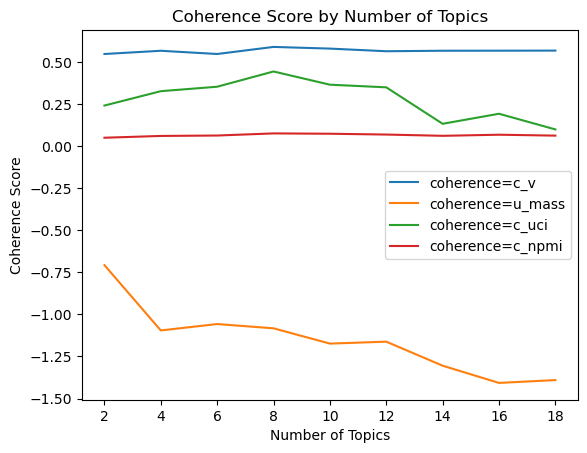

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, coherence='c_v'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, iterations=1000, alpha='auto', eta='auto', random_state=42)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# 하이퍼파라미터 튜닝 (다양한 coherence metric 사용)
coherence_metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

for coherence in coherence_metrics:
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['filtered_nouns_only'], start=2, limit=20, step=2, coherence=coherence)

    # 결과 시각화
    limit = 20
    start = 2
    step = 2
    x = range(start, limit, step)
    plt.plot(x, coherence_values, label=f'coherence={coherence}')

plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


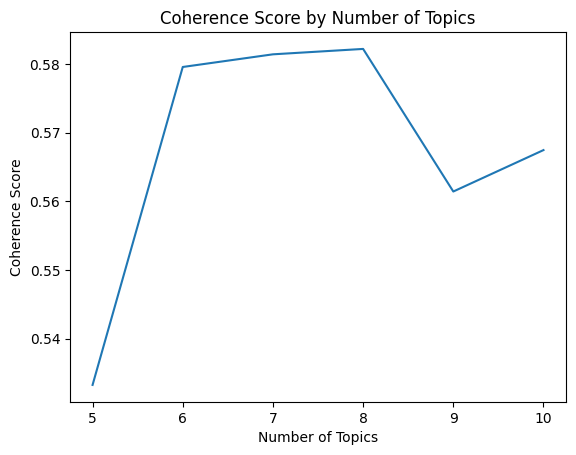

In [14]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit + 1, step):  # limit + 1 to include the limit value
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, iterations=1000, alpha='auto', eta='auto', random_state=42)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# 하이퍼파라미터 튜닝
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['filtered_nouns_only'], start=5, limit=10, step=1)

# 결과 시각화
limit = 10
start = 5
step = 1
x = range(start, limit + 1, step)  # limit + 1 to include the limit value
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


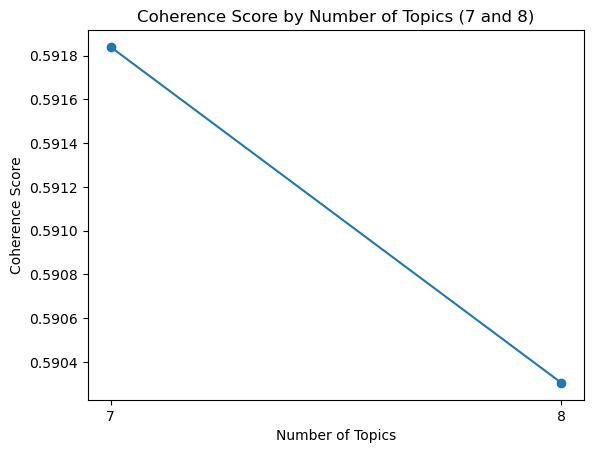

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, topics):
    coherence_values = []
    model_list = []
    for num_topics in topics:
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, iterations=1000, alpha='auto', eta='auto', random_state=42)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# 토픽 개수 리스트
topics = [7, 8]

# 모델 학습 및 코히런스 값 계산
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['filtered_nouns_only'], topics=topics)

# 결과 시각화
plt.plot(topics, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics (7 and 8)")
plt.xticks(topics)  # x축 눈금을 7과 8로 설정
plt.show()


### topic 5

In [ ]:
# LDA 모델 학습
lda_model = LdaModel(corpus,
                     num_topics=5,       # 추출할 주제 수
                     id2word=dictionary, # 인덱스와 단어 매핑
                     passes=15,          # 말뭉치 반복 학습 횟수
                     iterations=1000,    # 내부 루프 수
                     alpha='auto',       # 주제 분포 하이퍼파라미터
                     eta='auto',         # 단어 분포 하이퍼파라미터
                     random_state=42)    # 난수 생성 시드

# PyLDAvis를 사용한 시각화 준비
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# 시각화 표시
pyLDAvis.display(lda_display)

### topic 6

In [ ]:
# LDA 모델 학습
lda_model = LdaModel(corpus,
                     num_topics=6,       # 추출할 주제 수
                     id2word=dictionary, # 인덱스와 단어 매핑
                     passes=15,          # 말뭉치 반복 학습 횟수
                     iterations=1000,    # 내부 루프 수
                     alpha='auto',       # 주제 분포 하이퍼파라미터
                     eta='auto',         # 단어 분포 하이퍼파라미터
                     random_state=42)    # 난수 생성 시드

# PyLDAvis를 사용한 시각화 준비
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# 시각화 표시
pyLDAvis.display(lda_display)

### topic 7

In [ ]:
# LDA 모델 학습
lda_model = LdaModel(corpus,
                     num_topics=7,       # 추출할 주제 수
                     id2word=dictionary, # 인덱스와 단어 매핑
                     passes=15,          # 말뭉치 반복 학습 횟수
                     iterations=1000,    # 내부 루프 수
                     alpha='auto',       # 주제 분포 하이퍼파라미터
                     eta='auto',         # 단어 분포 하이퍼파라미터
                     random_state=42)    # 난수 생성 시드

# PyLDAvis를 사용한 시각화 준비
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# 시각화 표시
pyLDAvis.display(lda_display)

In [ ]:
# λ 값이 가장 낮을 때의 상위 단어 추출 함수
def extract_top_terms(lda_display, num_topics, num_words):
    top_terms = {}
    for topic_idx in range(num_topics):
        topic_terms = lda_display.topic_info[lda_display.topic_info.Category == f'Topic{topic_idx+1}']
        lambda_min_terms = topic_terms.sort_values(by='loglift', ascending=False).head(num_words)
        top_terms[topic_idx] = lambda_min_terms[['Term', 'Freq']].values.tolist()
    return top_terms

# 각 토픽에서 상위 단어와 해당 단어의 기여도(빈도) 추출
num_topics = 7  # 주제 수
num_words = 7  # 각 토픽에서 추출할 상위 단어 수

top_terms = extract_top_terms(lda_display, num_topics, num_words)

# 각 토픽의 단어와 기여도 출력
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx+1}:")
    for term, freq in top_terms[topic_idx]:
        print(f"{term}: {freq:.4f}")
    print("\n")

Topic 1:
컬리: 828.3976
다이소: 540.6565
에이: 534.1824
아모레퍼시픽: 329.7660
베뉴: 319.8309
편의점: 276.9285
왕홍: 217.1648


Topic 2:
어린이: 3168.3831
가소제: 973.4276
발암: 965.2957
프탈레이트계: 957.3532
장신구: 602.0784
치의: 558.3526
카드뮴: 431.5497


Topic 3:
위조: 308.9911
정품: 377.9253
비타민: 235.4828
위장: 215.9920
카메라: 349.2306
웨이하이: 152.3844
군산항: 146.5118


Topic 4:
와우: 657.9748
덕트: 172.5954
기획전: 180.4262
페스티벌: 156.9927
회비: 209.1030
로스: 156.1616
스마일: 88.7611


Topic 5:
윤석열: 241.2047
특검: 194.9749
이재명: 190.2188
총선: 190.6838
여당: 157.6384
거부권: 156.1129
당선인: 139.1182


Topic 6:
운임: 361.8198
홍해: 114.5280
대한항공: 124.2951
해운: 165.5158
컨테이너: 152.2372
한복: 98.9466
양호: 70.3671


Topic 7:
희토류: 223.7034
테슬라: 104.8947
철강: 96.5040
자립: 98.6436
도발: 85.4556
주석: 81.3099
강연: 68.4339




In [ ]:
# 단어를 변경하고 싶은 경우 (예시: Topic 1의 첫 번째 단어를 'new_term1'로 변경)
# 원하는 단어로 변경
def replace_term(topic_idx, old_term, new_term):
    for idx, (term, freq) in enumerate(top_terms[topic_idx]):
        if term == old_term:
            top_terms[topic_idx][idx] = [new_term, freq]

# 예시: Topic 1의 첫 번째 단어를 'new_term1'로 변경
replace_term(0, '에이', '에이블리')
replace_term(0, '베뉴', '케이베뉴')
replace_term(1, '치의', '기준치')
replace_term(3, '덕트', '프로덕트')
replace_term(3, '로스', '크로스')



# 변경된 단어 확인
for topic_idx in range(num_topics):
    print(f"Updated Topic {topic_idx+1}:")
    for term, freq in top_terms[topic_idx]:
        print(f"{term}: {freq:.4f}")
    print("\n")

Updated Topic 1:
컬리: 828.3976
다이소: 540.6565
에이블리: 534.1824
아모레퍼시픽: 329.7660
케이베뉴: 319.8309
편의점: 276.9285
왕홍: 217.1648


Updated Topic 2:
어린이: 3168.3831
가소제: 973.4276
발암: 965.2957
프탈레이트계: 957.3532
장신구: 602.0784
기준치: 558.3526
카드뮴: 431.5497


Updated Topic 3:
위조: 308.9911
정품: 377.9253
비타민: 235.4828
위장: 215.9920
카메라: 349.2306
웨이하이: 152.3844
군산항: 146.5118


Updated Topic 4:
와우: 657.9748
프로덕트: 172.5954
기획전: 180.4262
페스티벌: 156.9927
회비: 209.1030
크로스: 156.1616
스마일: 88.7611


Updated Topic 5:
윤석열: 241.2047
특검: 194.9749
이재명: 190.2188
총선: 190.6838
여당: 157.6384
거부권: 156.1129
당선인: 139.1182


Updated Topic 6:
운임: 361.8198
홍해: 114.5280
대한항공: 124.2951
해운: 165.5158
컨테이너: 152.2372
한복: 98.9466
양호: 70.3671


Updated Topic 7:
희토류: 223.7034
테슬라: 104.8947
철강: 96.5040
자립: 98.6436
도발: 85.4556
주석: 81.3099
강연: 68.4339




Topic 1:
컬리: 828.3976
다이소: 540.6565
에이: 534.1824
아모레퍼시픽: 329.7660
베뉴: 319.8309
편의점: 276.9285
왕홍: 217.1648


Topic 2:
어린이: 3168.3831
가소제: 973.4276
발암: 965.2957
프탈레이트계: 957.3532
장신구: 602.0784
치의: 558.3526
카드뮴: 431.5497


Topic 3:
위조: 308.9911
정품: 377.9253
비타민: 235.4828
위장: 215.9920
카메라: 349.2306
웨이하이: 152.3844
군산항: 146.5118


Topic 4:
와우: 657.9748
덕트: 172.5954
기획전: 180.4262
페스티벌: 156.9927
회비: 209.1030
로스: 156.1616
스마일: 88.7611


Topic 5:
윤석열: 241.2047
특검: 194.9749
이재명: 190.2188
총선: 190.6838
여당: 157.6384
거부권: 156.1129
당선인: 139.1182


Topic 6:
운임: 361.8198
홍해: 114.5280
대한항공: 124.2951
해운: 165.5158
컨테이너: 152.2372
한복: 98.9466
양호: 70.3671


Topic 7:
희토류: 223.7034
테슬라: 104.8947
철강: 96.5040
자립: 98.6436
도발: 85.4556
주석: 81.3099
강연: 68.4339


Updated Topic 1:
컬리: 828.3976
다이소: 540.6565
에이블리: 534.1824
아모레퍼시픽: 329.7660
케이베뉴: 319.8309
편의점: 276.9285
왕홍: 217.1648


Updated Topic 2:
어린이: 3168.3831
가소제: 973.4276
발암: 965.2957
프탈레이트계: 957.3532
장신구: 602.0784
기준치: 558.3526
카드뮴: 431.5497


Updated Topic 3:
위조:

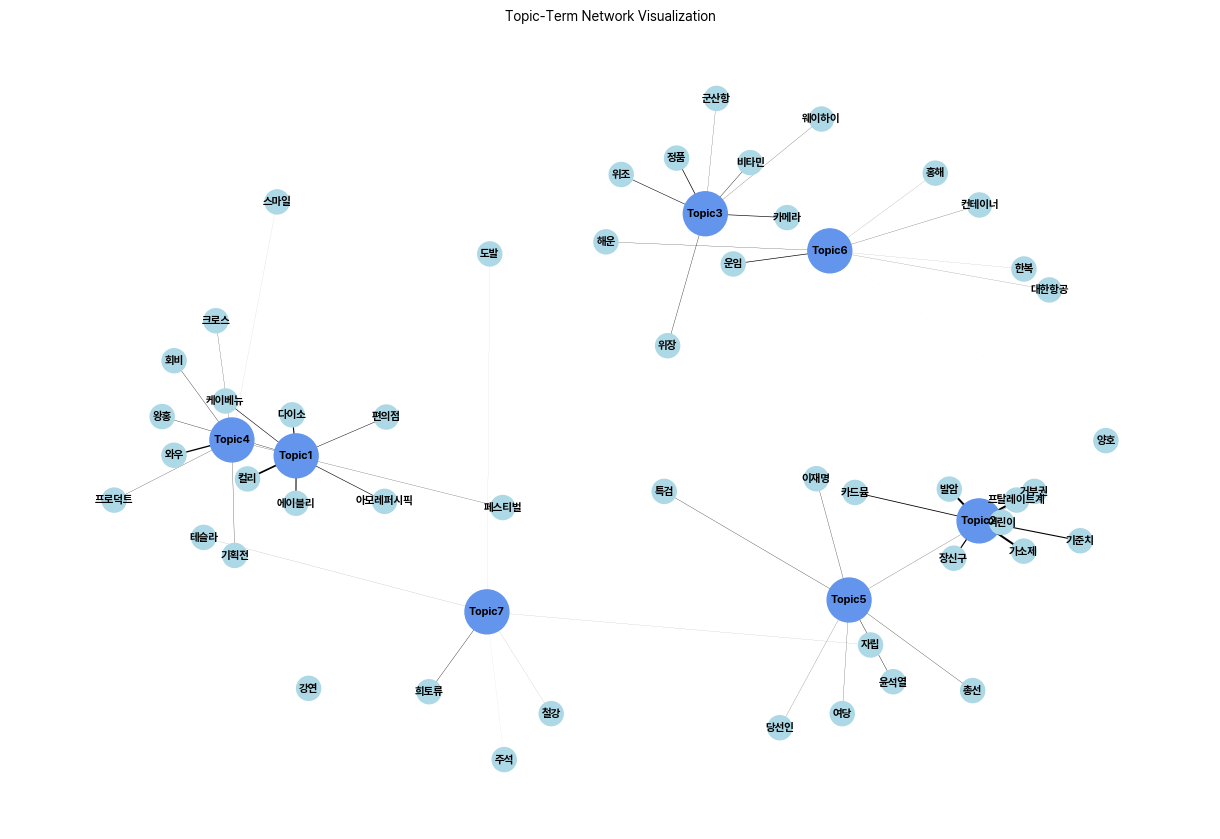

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/Users/zodolli/Library/Fonts/Pretendard-Regular.ttf'  # Pretendard-Regular 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

# λ 값이 가장 낮을 때의 상위 단어 추출 함수
def extract_top_terms(lda_display, num_topics, num_words):
    top_terms = {}
    for topic_idx in range(num_topics):
        topic_terms = lda_display.topic_info[lda_display.topic_info.Category == f'Topic{topic_idx+1}']
        lambda_min_terms = topic_terms.sort_values(by='loglift', ascending=False).head(num_words)
        top_terms[topic_idx] = lambda_min_terms[['Term', 'Freq']].values.tolist()
    return top_terms

# 각 토픽에서 상위 단어와 해당 단어의 기여도(빈도) 추출
num_topics = 7  # 주제 수
num_words = 7  # 각 토픽에서 추출할 상위 단어 수

top_terms = extract_top_terms(lda_display, num_topics, num_words)

# 각 토픽의 단어와 기여도 출력
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx+1}:")
    for term, freq in top_terms[topic_idx]:
        print(f"{term}: {freq:.4f}")
    print("\n")

# 단어를 변경하고 싶은 경우 (예시: Topic 1의 첫 번째 단어를 'new_term1'로 변경)
# 원하는 단어로 변경
def replace_term(topic_idx, old_term, new_term):
    for idx, (term, freq) in enumerate(top_terms[topic_idx]):
        if term == old_term:
            top_terms[topic_idx][idx] = [new_term, freq]

# 예시: Topic 1의 첫 번째 단어를 'new_term1'로 변경
replace_term(0, '에이', '에이블리')
replace_term(0, '베뉴', '케이베뉴')
replace_term(1, '치의', '기준치')
replace_term(3, '덕트', '프로덕트')
replace_term(3, '로스', '크로스')

# 변경된 단어 확인
for topic_idx in range(num_topics):
    print(f"Updated Topic {topic_idx+1}:")
    for term, freq in top_terms[topic_idx]:
        print(f"{term}: {freq:.4f}")
    print("\n")

# 네트워크 생성 함수
def create_network(top_terms, num_topics):
    G = nx.Graph()

    # Add nodes for each topic
    for topic_idx in range(num_topics):
        G.add_node(f'Topic{topic_idx+1}', node_type='topic')

    # Add edges based on top terms and their frequencies
    for topic_idx in range(num_topics):
        for term, freq in top_terms[topic_idx]:
            G.add_node(term, node_type='term')
            G.add_edge(f'Topic{topic_idx+1}', term, weight=freq)

    return G

# 가중치 정규화 함수
def normalize_weights(G):
    weights = [d['weight'] for u, v, d in G.edges(data=True)]
    scaler = MinMaxScaler()
    normalized_weights = scaler.fit_transform([[w] for w in weights])

    for (u, v, d), w in zip(G.edges(data=True), normalized_weights):
        d['weight'] = w[0]

    return G

# 네트워크 시각화 함수
def draw_network(G, fontprop, num_topics):
    pos = nx.spring_layout(G, seed=42)  # Layout for a better visualization with a fixed seed for consistency
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Get nodes by type
    topic_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'topic']
    term_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'term']

    # Assign colors and sizes
    topic_color = 'cornflowerblue'
    term_color = 'lightblue'
    node_colors = [topic_color if node in topic_nodes else term_color for node in G.nodes()]
    node_sizes = [1000 if node in topic_nodes else 300 for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_weight='bold', font_family=fontprop.get_name(), width=[w * 5 for w in weights], font_color='black')
    plt.title('Topic-Term Network Visualization', fontproperties=fontprop)
    plt.show()

# Example usage with your top_terms data
G = create_network(top_terms, num_topics)
G = normalize_weights(G)  # Normalize the weights
draw_network(G, fontprop, num_topics)


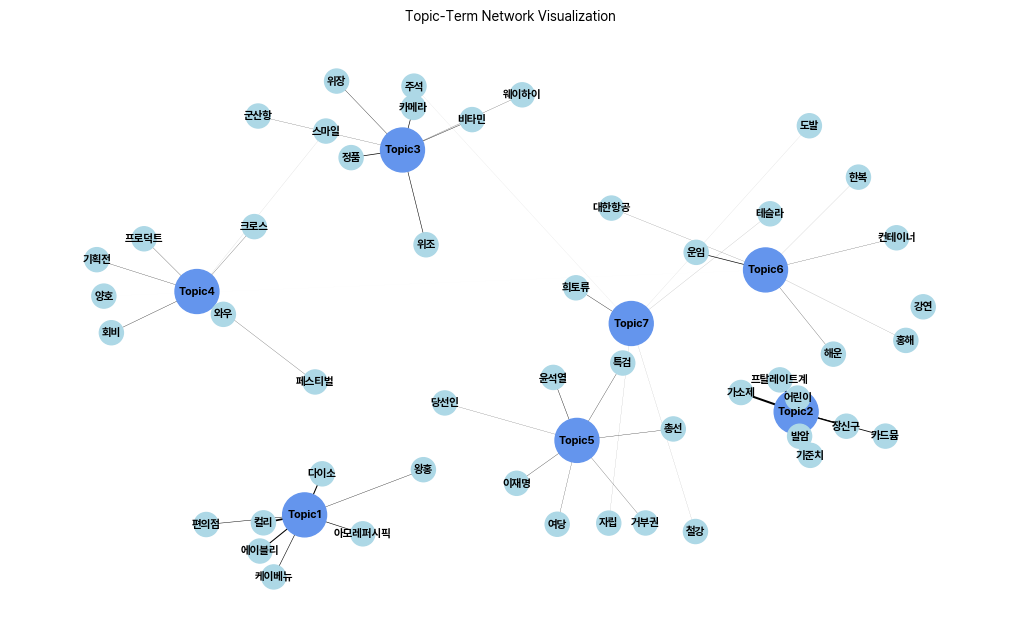

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/Users/zodolli/Library/Fonts/Pretendard-Regular.ttf'  # MalgunGothic 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

def create_network(top_terms, num_topics):
    G = nx.Graph()

    # Add nodes for each topic
    for topic_idx in range(num_topics):
        G.add_node(f'Topic{topic_idx+1}', node_type='topic')

    # Add edges based on top terms and their frequencies
    for topic_idx in range(num_topics):
        for term, freq in top_terms[topic_idx]:
            G.add_node(term, node_type='term')
            G.add_edge(f'Topic{topic_idx+1}', term, weight=freq)

    return G

def normalize_weights(G):
    weights = [d['weight'] for u, v, d in G.edges(data=True)]
    scaler = MinMaxScaler()
    normalized_weights = scaler.fit_transform([[w] for w in weights])

    for (u, v, d), w in zip(G.edges(data=True), normalized_weights):
        d['weight'] = w[0]

    return G

def draw_network(G, fontprop, num_topics):
    pos = nx.spring_layout(G)  # Layout for a better visualization
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Get nodes by type
    topic_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'topic']
    term_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'term']

    # Assign colors and sizes
    topic_color = 'cornflowerblue'
    term_color = 'lightblue'
    node_colors = [topic_color if node in topic_nodes else term_color for node in G.nodes()]
    node_sizes = [1000 if node in topic_nodes else 300 for node in G.nodes()]

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_weight='bold', font_family=fontprop.get_name(), width=[w * 5 for w in weights], font_color='black')  # Set font_color to white
    plt.title('Topic-Term Network Visualization', fontproperties=fontprop)
    plt.show()

# Example usage with your top_terms data
num_topics = 7  # Example number of topics
# top_terms should be your pre-extracted terms and frequencies from the LDA model
# top_terms = extract_top_terms(lda_display, num_topics, num_words)

G = create_network(top_terms, num_topics)
G = normalize_weights(G)  # Normalize the weights
draw_network(G, fontprop, num_topics)



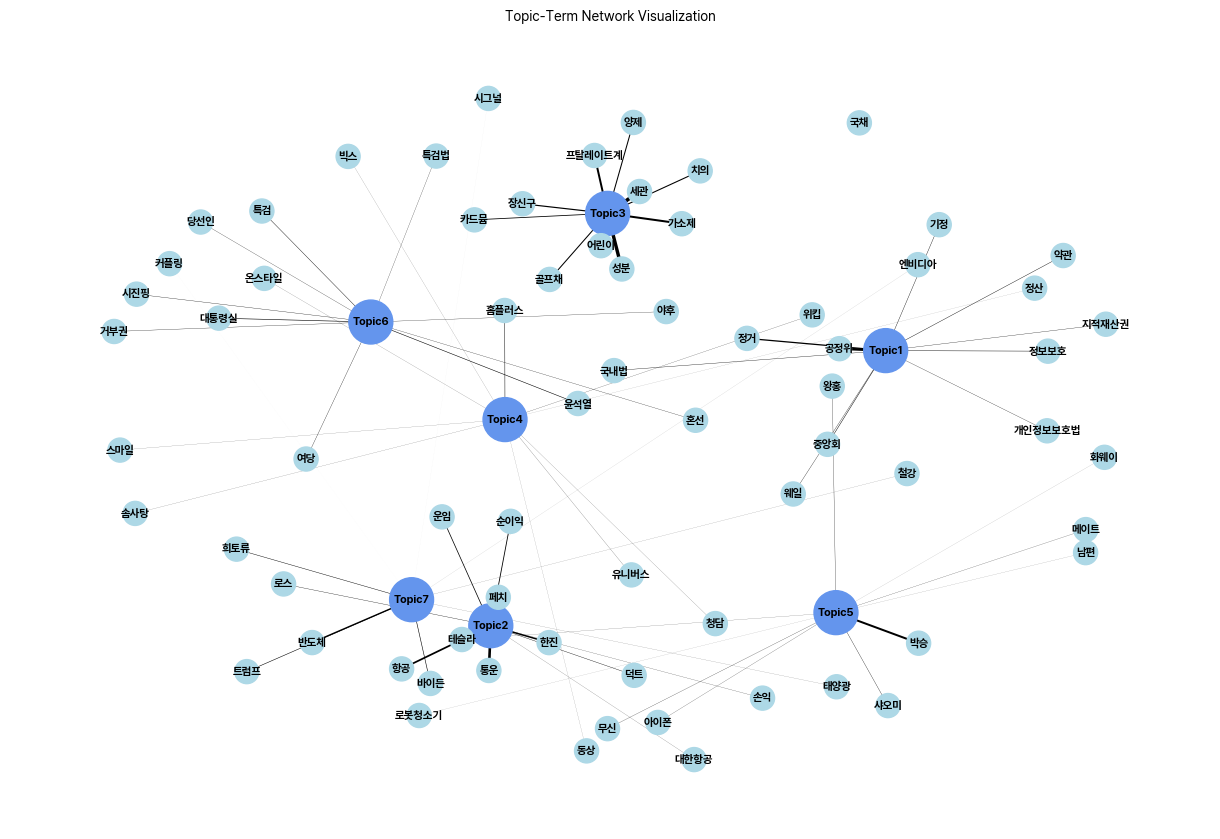

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 설정
font_path = '/Users/zodolli/Library/Fonts/Pretendard-Regular.ttf'  # Pretendard-Regular 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

def create_network(top_terms, num_topics):
    G = nx.Graph()

    # Add nodes for each topic
    for topic_idx in range(num_topics):
        G.add_node(f'Topic{topic_idx+1}', node_type='topic')

    # Add edges based on top terms and their frequencies
    for topic_idx in range(num_topics):
        for term, freq in top_terms[topic_idx]:
            G.add_node(term, node_type='term')
            G.add_edge(f'Topic{topic_idx+1}', term, weight=freq)

    return G

def normalize_weights(G):
    weights = [d['weight'] for u, v, d in G.edges(data=True)]
    scaler = MinMaxScaler()
    normalized_weights = scaler.fit_transform(np.array(weights).reshape(-1, 1))

    for (u, v, d), w in zip(G.edges(data=True), normalized_weights):
        d['weight'] = w[0]

    return G

def draw_network(G, fontprop, num_topics):
    pos = nx.spring_layout(G, k=0.3, iterations=100)  # Adjust k and iterations for better spacing
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Get nodes by type
    topic_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'topic']
    term_nodes = [node for node, data in G.nodes(data=True) if data['node_type'] == 'term']

    # Assign colors and sizes
    topic_color = 'cornflowerblue'
    term_color = 'lightblue'
    node_colors = [topic_color if node in topic_nodes else term_color for node in G.nodes()]
    node_sizes = [1000 if node in topic_nodes else 300 for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_weight='bold', font_family=fontprop.get_name(), width=[w * 5 for w in weights], font_color='black')
    plt.title('Topic-Term Network Visualization', fontproperties=fontprop)
    plt.show()

# Example usage with your top_terms data
num_topics = 7  # Example number of topics
# top_terms should be your pre-extracted terms and frequencies from the LDA model
# top_terms = extract_top_terms(lda_display, num_topics, num_words)

G = create_network(top_terms, num_topics)
G = normalize_weights(G)  # Normalize the weights
draw_network(G, fontprop, num_topics)


### topic 8

In [ ]:
# LDA 모델 학습
lda_model = LdaModel(corpus,
                     num_topics=8,       # 추출할 주제 수
                     id2word=dictionary, # 인덱스와 단어 매핑
                     passes=15,          # 말뭉치 반복 학습 횟수
                     iterations=1000,    # 내부 루프 수
                     alpha='auto',       # 주제 분포 하이퍼파라미터
                     eta='auto',         # 단어 분포 하이퍼파라미터
                     random_state=42)    # 난수 생성 시드

# PyLDAvis를 사용한 시각화 준비
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# 시각화 표시
pyLDAvis.display(lda_display)